In [1]:
import tensorflow as tf

In [2]:
print(f'wersja tf: {tf.__version__}')

wersja tf: 2.11.1


In [3]:
#zbiór danych - MNIST
mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()
#normalizacja danych - obrazu
x_train,x_test = x_train/255.0,x_test/255.0

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2952 - accuracy: 0.9147
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1412 - accuracy: 0.9583
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1054 - accuracy: 0.9680
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0866 - accuracy: 0.9730
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0753 - accuracy: 0.9762
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0649 - accuracy: 0.9792
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0594 - accuracy: 0.9812
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0528 - accuracy: 0.9825
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0489 - accuracy: 0.9840
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.046

In [10]:
#ocena modelu
test_loss, test_accuracy = model.evaluate(x_test,y_test,verbose=2)
print(f'strata -> {test_loss}')
print(f'dokładnośc -> {test_accuracy}')

313/313 - 1s - loss: 0.0694 - accuracy: 0.9791 - 729ms/epoch - 2ms/step
strata -> 0.06944149732589722
dokładnośc -> 0.9790999889373779


In [11]:
import matplotlib.pyplot as plt

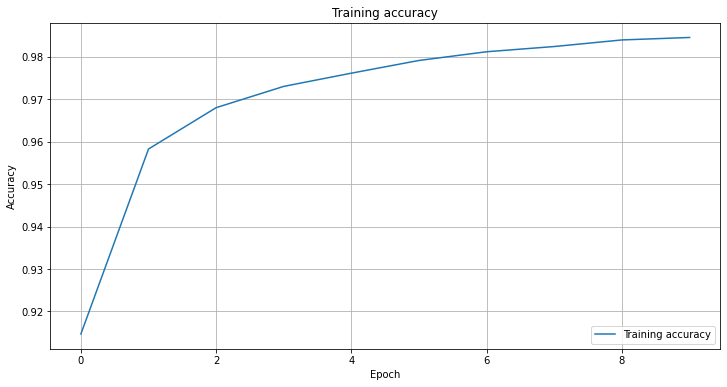

In [12]:
acc = history.history['accuracy']

epochs = range(len(acc))

plt.figure(figsize=(12,6))
plt.plot(epochs,acc,label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

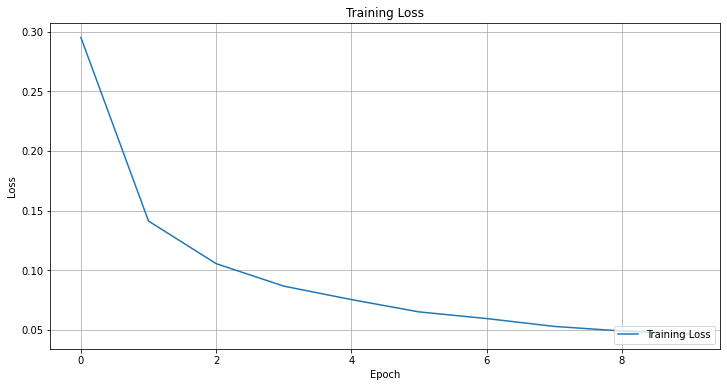

In [13]:
acc = history.history['loss']

epochs = range(len(acc))

plt.figure(figsize=(12,6))
plt.plot(epochs,acc,label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()